In [51]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 15}

matplotlib.rc('font', **font)

In [62]:
dt = 1 / 1000                                           # time bin width 1 msec
T = (np.linspace(.1, 1, 10) / dt).astype(int)           # timepoints at which posterior variance is computed
gamma = 1                                               # 1 change point in whole trial
alpha = [1.37015621187, 1.5582575695, 2.61803398875]    # Hyperparameters for Beta prior over h
beta = [0.370156211872, 0.558257569496, 1.61803398875]  # with mode = 1Hz and variance = [10, 5, 1]

In [63]:
def h_var(alpha, beta, gamma, T, dt):
    return [(a + gamma)*(b + T - dt - gamma) / ((a + b + T - dt)**2 * (a + b + T)) for a, b in zip(alpha, beta)]

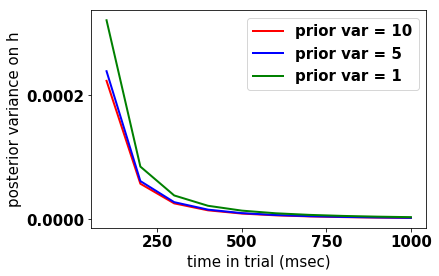

In [66]:
plt.figure()
lw = 2
Variance = h_var(alpha, beta, gamma, T, dt) 
plt.plot(T, Variance[0], 'red', label='prior var = 10', linewidth = lw)    # prior Variance = 10
plt.plot(T, Variance[1], 'blue', label='prior var = 5', linewidth = lw)   # prior Variance = 5
plt.plot(T, Variance[2], 'green', label='prior var = 1',linewidth = lw)  # prior Variance = 1
ax = plt.gca()
ax.locator_params(nbins = 4, axis = 'x')
ax.locator_params(nbins = 3, axis = 'y')
plt.title('')
plt.ylabel('posterior variance on h')
plt.xlabel('time in trial (msec)')
plt.legend()
plt.show()